<a href="https://colab.research.google.com/github/EliasSf73/test_/blob/master/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Datasets and DataLoader

In [5]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert a PIL Image or numpy.ndarray to tensor.
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize a tensor image with mean and standard deviation.
])

# Download and load the MNIST training data
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the MNIST test data
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 255760817.71it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 65798855.96it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 163658748.56it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 17754453.65it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Visualization

Size of train set: 60000
Size of test set: 10000


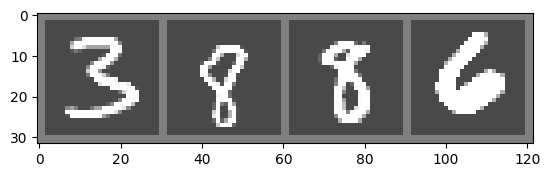

 3  8  8  6


In [14]:
# Print out the sizes of the train and test sets
print(f'Size of train set: {len(trainset)}')
print(f'Size of test set: {len(testset)}')

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show images
imshow(torchvision.utils.make_grid(images[:4]))
# Print labels
print(' '.join(f'{labels[j].item():2d}' for j in range(4)))


# The Model

Epoch: 1, Batch: 500, Avg. Loss: 1.0575
Epoch: 2, Batch: 500, Avg. Loss: 0.3150
Epoch: 3, Batch: 500, Avg. Loss: 0.2498
Epoch: 4, Batch: 500, Avg. Loss: 0.2102
Epoch: 5, Batch: 500, Avg. Loss: 0.1762
Epoch: 6, Batch: 500, Avg. Loss: 0.1517
Epoch: 7, Batch: 500, Avg. Loss: 0.1322
Epoch: 8, Batch: 500, Avg. Loss: 0.1220
Epoch: 9, Batch: 500, Avg. Loss: 0.1063
Epoch: 10, Batch: 500, Avg. Loss: 0.0992


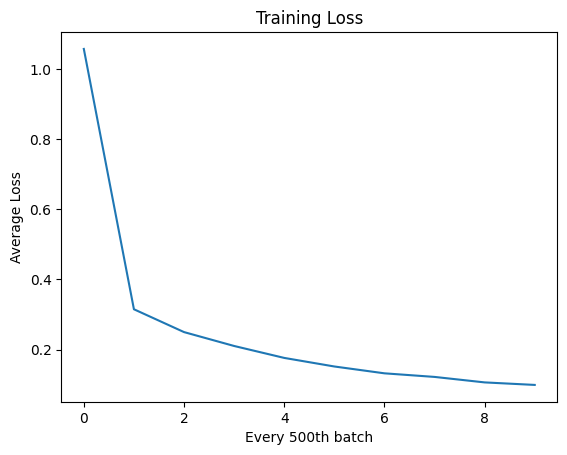

Finished Training


In [18]:


# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2=nn.Linear(512,84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
# List to store the loss values
loss_values = []
# Training loop
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 100 mini-batches
           avg_loss = running_loss / 500
           print(f'Epoch: {epoch + 1}, Batch: {i + 1}, Avg. Loss: {avg_loss:.4f}')
           loss_values.append(avg_loss)
           running_loss = 0.0
           running_loss = 0.0
# Plot the training loss
plt.plot(loss_values)
plt.title('Training Loss')
plt.xlabel('Every 500th batch')
plt.ylabel('Average Loss')
plt.show()

print('Finished Training')


In [19]:
# Define the device for computation
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Send the model to the device (CPU or GPU)
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

# Accuracy Evaluation

In [20]:
# Function to evaluate the accuracy on the given data loader
def evaluate_accuracy(data_loader, model):
    total_correct = 0
    total_images = 0
    model.eval()  # put the model in evaluation mode
    with torch.no_grad():  # turn off gradients for validation, saves memory and computations
        for data in data_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()

    model.train()  # put the model back in training mode
    return total_correct / total_images

# Check the accuracy on the test dataset
test_accuracy = evaluate_accuracy(testloader, model)
print(f'Accuracy of the model on the {len(testset)} test images: {test_accuracy*100}%')


Accuracy of the model on the 10000 test images: 96.95%


# ***Save Model***

In [21]:
torch.save(model.state_dict(), './model.pth')
print("Saved the model's state_dict to model.pth")

Saved the model's state_dict to model.pth


# **On Unseen Data**

In [22]:
# Inference on new unseen data
def predict_new_data(new_data_loader, model):
    model.eval()  # put the model in evaluation mode
    predictions = []
    with torch.no_grad():  # we do not need gradients for inference
        for data in new_data_loader:
            images, _ = data
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.cpu().numpy())

    model.train()  # put the model back in training mode
    return predictions